# Model T2 figures

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import seaborn
from pathlib import Path
from matplotlib import rc

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
rc('font', **font)
import pyabc

# Var 1.0

In [2]:
sleepvar=1.0

filepath = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Data/Model_T2/results/Var"+str(sleepvar)

def calc_ave_time(gp, sampler_id, nsize, psize, iter):
    all_times = 0
    for i in range(iter):
        full_path = os.path.join(gp,f"{sampler_id}{str(nsize)}_{str(psize)}_{str(i)}.db")
        history_DLA_20=pyabc.History("sqlite:///" +
                                  full_path)
    #     DLAD_20 = history_DLA_20.get_all_populations()
    #     starttime_20 = DLAD_20["population_end_time"][0]
        abc = history_DLA_20.get_abc()
        total_time = (abc.end_time - abc.start_time).total_seconds()
        all_times +=total_time
        print(f"{sampler_id}{str(nsize)}_{str(psize)}_{str(i)}.db: {total_time}")

    return all_times/iter
sampler = "DYNLA"

def show_values(pc, fmt='%.0f%%', **kw):
    pc.update_scalarmappable()
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-1, :].mean(0)
        x=x+0.15
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="right", va="top", color=color, **kw)
                
#Creation of Fig 7 and 10b



In [3]:
#global variables
#sleepvar is the variance of the idle time
nodelist=np.array([1, 2,4,8])
workers_per_node = 32

datalist=[]

outputpath = os.getcwd() + "/T2_figures"

#Read in files
for i in range(len(nodelist)):
    datalist.append(pd.read_csv(
        os.path.join(filepath, "sleeptimeresults"+str(nodelist[i])+".txt"),
        delimiter = ", ", engine = 'python'))

data1worker=pd.read_csv(os.path.join(filepath, "sleeptimeresults1.txt"), delimiter = ", ", engine = 'python')
    
pop_sizes = datalist[0].loc[datalist[0]['Look_ahead']=='LA_pre']['Pop size'].values
print(pop_sizes)
meanslist = []

for i in range(len(nodelist)):
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='LA_pre']['Runtime Expectation'].values)
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
#     meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)

meanslist_LA = []

for i in range(len(nodelist)):
    meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='LA']['Runtime Expectation'].values)
#     meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
    meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)

nodelist = nodelist * 32
meanslist

[  20   80  320 1280]


[array([ 29.82519091,  60.9496594 , 189.25209089, 721.93335592]),
 array([ 48.69909281,  86.6024648 , 219.17451752, 756.38219545]),
 array([ 30.2645857 ,  45.33717772, 106.00941141, 370.7398048 ]),
 array([ 49.77237601,  71.36067014, 148.01605766, 415.39299871]),
 array([ 33.71462483,  43.23199285,  70.76157933, 193.58722287]),
 array([ 59.8559925 ,  69.5627932 , 108.69012326, 247.03543645]),
 array([ 39.26976219,  40.90419276,  58.72376424, 118.93626813]),
 array([ 71.1056171 ,  74.13595722,  98.41432181, 187.05874969])]

In [4]:
data1worker

,Pop size,Look_ahead,Repetitions,Runtime Expectation,Runtime Variance,total Walltime
0,20,Ori,13,48.699093,55.345280,635.885203
1,80,Ori,13,86.602465,39.513494,1127.381974
2,320,Ori,13,219.174518,102.148255,2850.856881
3,1280,Ori,13,756.382195,417.143233,9834.849851
4,20,LA,13,40.832161,11.229947,532.399193
5,80,LA,13,74.208346,75.646522,966.261694
6,320,LA,13,205.473839,73.470349,2672.804482
7,1280,LA,13,736.919036,95.576449,9581.788710
8,20,LA_pre,13,29.825191,18.149211,389.401373
9,80,LA_pre,13,60.949659,11.855898,793.950188


In [5]:
#Turn them into arrays (rows correspond to same number of workers)
PPParray=np.zeros((len(nodelist),len(pop_sizes)))
ORIarray=np.zeros((len(nodelist),len(pop_sizes)))
LAarray=np.zeros((len(nodelist),len(pop_sizes)))
Statarray=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(len(nodelist)):
    print(i)
    PPParray[i,:]=meanslist[2*i]
    ORIarray[i,:]=meanslist[2*i+1]
    
for i in range(len(nodelist)):
    print(i)
    LAarray[i,:]=meanslist_LA[2*i]
    Statarray[i,:]=meanslist_LA[2*i+1]



0
1
2
3
0
1
2
3


In [6]:
PPParray

array([[ 29.82519091,  60.9496594 , 189.25209089, 721.93335592],
       [ 30.2645857 ,  45.33717772, 106.00941141, 370.7398048 ],
       [ 33.71462483,  43.23199285,  70.76157933, 193.58722287],
       [ 39.26976219,  40.90419276,  58.72376424, 118.93626813]])

In [7]:
LAarray

array([[ 40.83216062,  74.20834598, 205.47383948, 736.9190365 ],
       [ 34.72362571,  57.57451149, 127.79939022, 392.61986898],
       [ 34.8260929 ,  50.2082817 ,  85.18866517, 222.0388528 ],
       [ 40.40551453,  48.11214282,  72.78352242, 141.91550216]])

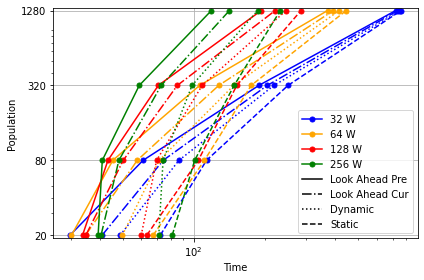

In [8]:
#plot not used
colors=["blue", "orange" ,"red", "green", "purple"]

#plt.plot(PPParray[0,:],pop_sizes,label=str(nodes[0])+" Cores", marker="o", markersize=5, color=colors[0])

for i in range(0,len(nodelist)):
    plt.plot(PPParray[i,:],pop_sizes,label=str(nodelist[i])+" W", marker="o", markersize=5, color=colors[i])
    plt.plot(LAarray[i,:],pop_sizes, marker="o", markersize=5, color=colors[i], linestyle= "dashdot")
    plt.plot(ORIarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dotted")
    plt.plot(Statarray[i,:],pop_sizes, marker="o", markersize=5, color = colors[i], linestyle="dashed")

plt.plot([0],[10], label="Look Ahead Pre", color = "black")
plt.plot([0],[10], label="Look Ahead Cur", color = "black", linestyle= "dashdot")

plt.plot([0],[10], label="Dynamic", color = "black", linestyle = "dotted")

plt.plot([0],[10], label="Static", color = "black", linestyle = "dashed")
    
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.ylabel("Population")
plt.yticks(pop_sizes,pop_sizes)
plt.xscale('log')
plt.xlabel("Time")
plt.ylim(0.95*pop_sizes[0],1.05*pop_sizes[-1])
plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()

plt.savefig(outputpath+"/T2_Cores_PopRuntimeVar"+str(sleepvar)+".pdf")


Here we calculate the parallel efficiencies as runtime(1 worker)/ (W runtime(W workers))

In [9]:
# pop_sizes_1=pop_sizes[0:-1]

# means1PPP = data1worker.loc[data1worker['Look_ahead']=='LA_pre']['Runtime Expectation'].values
# means1PPP = np.append(means1PPP, 4*means1PPP[-1])
# means1_ori = data1worker.loc[data1worker['Look_ahead']=='Ori']['Runtime Expectation'].values
# means1_ori = np.append(means1_ori, 4*means1_ori[-1])

# par_efficiency=np.zeros((len(nodelist),len(pop_sizes)))

# for i in range(0,len(nodelist)):
#     for j in range(0,len(pop_sizes)):
#         par_efficiency[i,j]=means1PPP[j]/(PPParray[i,j]*(nodelist[i]/workers_per_node))

# par_efficiency_ori=np.zeros((len(nodelist),len(pop_sizes)))

# for i in range(0,len(nodelist)):
#     for j in range(0,len(pop_sizes)):
#         par_efficiency_ori[i,j]=means1_ori[j]/(ORIarray[i,j]*(nodelist[i]/workers_per_node))



PPParray

array([[ 29.82519091,  60.9496594 , 189.25209089, 721.93335592],
       [ 30.2645857 ,  45.33717772, 106.00941141, 370.7398048 ],
       [ 33.71462483,  43.23199285,  70.76157933, 193.58722287],
       [ 39.26976219,  40.90419276,  58.72376424, 118.93626813]])

In [10]:
pop_sizes_1=pop_sizes[0:-1]

means1PPP = data1worker.loc[data1worker['Look_ahead']=='LA_pre']['Runtime Expectation'].values
means1PPP = np.append(means1PPP, 4*means1PPP[-1])
means1_ori = data1worker.loc[data1worker['Look_ahead']=='Ori']['Runtime Expectation'].values
means1_ori = np.append(means1_ori, 4*means1_ori[-1])

par_efficiency=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency[i,j]=(means1_ori[j]*workers_per_node)/(PPParray[i,j]*(nodelist[i]))

par_efficiency_ori=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_ori[i,j]=(means1_ori[j]*workers_per_node)/(ORIarray[i,j]*(nodelist[i]))



In [11]:
nodelist

array([ 32,  64, 128, 256])

In [12]:
# pop_sizes_1=pop_sizes[0:-1]

# means1_LA = data1worker.loc[data1worker['Look_ahead']=='LA']['Runtime Expectation'].values
# means1_LA = np.append(means1_LA, 4*means1_LA[-1])
# means1_ori_LA = data1worker.loc[data1worker['Look_ahead']=='Ori']['Runtime Expectation'].values
# means1_ori_LA = np.append(means1_ori_LA, 4*means1_ori_LA[-1])

# par_efficiency_LA=np.zeros((len(nodelist),len(pop_sizes)))

# for i in range(0,len(nodelist)):
#     for j in range(0,len(pop_sizes)):
#         par_efficiency_LA[i,j]=means1_LA[j]/(LAarray[i,j]*(nodelist[i]/workers_per_node))

# par_efficiency_ori_LA=np.zeros((len(nodelist),len(pop_sizes)))

# for i in range(0,len(nodelist)):
#     for j in range(0,len(pop_sizes)):
#         par_efficiency_ori_LA[i,j]=means1_ori_LA[j]/(ORIarray[i,j]*(nodelist[i]/workers_per_node))



In [13]:
LAarray

array([[ 40.83216062,  74.20834598, 205.47383948, 736.9190365 ],
       [ 34.72362571,  57.57451149, 127.79939022, 392.61986898],
       [ 34.8260929 ,  50.2082817 ,  85.18866517, 222.0388528 ],
       [ 40.40551453,  48.11214282,  72.78352242, 141.91550216]])

In [14]:
pop_sizes_1=pop_sizes[0:-1]

# means1_LA = data1worker.loc[data1worker['Look_ahead']=='LA']['Runtime Expectation'].values
# means1_LA = np.append(means1_LA, 4*means1_LA[-1])
# # means1_ori_LA = data1worker.loc[data1worker['Look_ahead']=='Ori']['Runtime Expectation'].values
# # means1_ori_LA = np.append(means1_ori_LA, 4*means1_ori_LA[-1])

par_efficiency_LA=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(0,len(nodelist)):
    for j in range(0,len(pop_sizes)):
        par_efficiency_LA[i,j]=(means1_ori[j]*workers_per_node)/(LAarray[i,j]*(nodelist[i]))

# 



In [15]:
PPParray

array([[ 29.82519091,  60.9496594 , 189.25209089, 721.93335592],
       [ 30.2645857 ,  45.33717772, 106.00941141, 370.7398048 ],
       [ 33.71462483,  43.23199285,  70.76157933, 193.58722287],
       [ 39.26976219,  40.90419276,  58.72376424, 118.93626813]])

/tmp/ipykernel_866/973755879.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
/tmp/ipykernel_866/973755879.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','32','', '64','', '128','',  '256'])


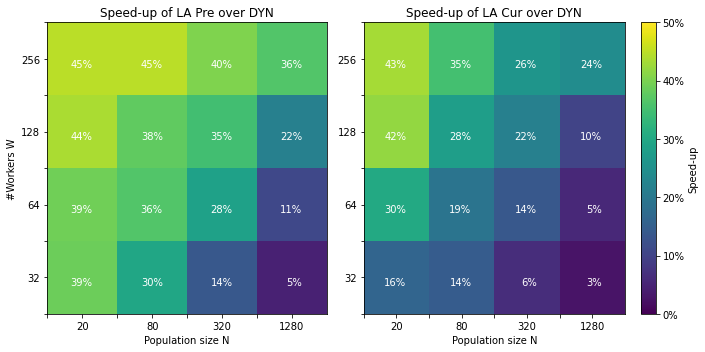

In [16]:
#Creation of Fig 7 and 10b
fig, axes = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios': [1,1+1/6]})

ax=axes[0]


vmax=50

frac_speedup = (1-(PPParray/ORIarray))*100
# vmax=np.max(np.matrix(frac_speedup))


im = ax.pcolormesh(frac_speedup, vmin=0, vmax=vmax)
# fig.colorbar(im)
show_values(im)

# cbar = fig.colorbar(im, ax=ax, format= '%.0f%%')
# cbar.set_label('Speed-up')

# fig.tight_layout()
plt.xlim(xmax=4)
plt.ylim(ymax=4)
ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
ax.set_xticks(np.arange(0, 4, 0.5))

ax.set_xticklabels(['', '20','', '80', '', '320', '', '1280'])
ax.set_xlabel("Population size N")
ax.set_ylabel("#Workers W")
ax.set_title('Speed-up of LA Pre over DYN')

#Creation of Fig 9 and 10c
ax=axes[1]


vmax=50

frac_speedup = (1-(LAarray/ORIarray))*100
# vmax=np.max(np.matrix(frac_speedup))


im = ax.pcolormesh(frac_speedup, vmin=0, vmax=vmax)
# fig.colorbar(im)
show_values(im)

cbar = fig.colorbar(im, ax=ax, format= '%.0f%%')
cbar.set_label('Speed-up')

# fig.tight_layout()
plt.xlim(xmax=4)
plt.ylim(ymax=4)
ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
ax.set_xticks(np.arange(0, 4, 0.5))

ax.set_xticklabels(['', '20','', '80', '', '320', '', '1280'])
ax.set_xlabel("Population size N")
# plt.ylabel("#Workers W")
ax.set_title('Speed-up of LA Cur over DYN')

fig.tight_layout()

plt.savefig(outputpath+"/ODEFig4Var"+str(sleepvar)+"_speedup_num_LA_v2.pdf")
plt.show()

# Var 2.0

In [17]:
sleepvar=2.0
filepath = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Data/Model_T2/results/Var"+str(sleepvar)

#global variables
#sleepvar is the variance of the idle time
nodelist=np.array([1, 2,4,8])
workers_per_node = 32

datalist=[]


#Read in files
for i in range(len(nodelist)):
    datalist.append(pd.read_csv(
        os.path.join(filepath, "sleeptimeresults"+str(nodelist[i])+".txt"),
        delimiter = ", ", engine = 'python'))

data1worker=pd.read_csv(os.path.join(filepath, "sleeptimeresults1.txt"), delimiter = ", ", engine = 'python')
    
pop_sizes = datalist[0].loc[datalist[0]['Look_ahead']=='LA_pre']['Pop size'].values
print(pop_sizes)
meanslist = []

for i in range(len(nodelist)):
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='LA_pre']['Runtime Expectation'].values)
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
#     meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)

meanslist_LA = []

for i in range(len(nodelist)):
    meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='LA']['Runtime Expectation'].values)
#     meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
    meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)

nodelist = nodelist * 32
meanslist

[  20   80  320 1280]


[array([ 44.90134841,  69.1969879 , 197.49841175, 726.72598378]),
 array([ 67.59645728, 116.5234011 , 262.67238419, 803.99359039]),
 array([ 49.37761037,  69.92817149, 122.27964299, 376.11166206]),
 array([ 68.14303123, 104.86555765, 197.6924183 , 463.9515529 ]),
 array([ 50.15109998,  63.74229649,  95.82873214, 219.21984438]),
 array([ 84.23152799, 114.98045323, 163.9282036 , 305.71553758]),
 array([ 54.434146  ,  68.79234895,  88.55272363, 159.92938412]),
 array([101.17065085, 119.89342486, 153.92216119, 257.4956239 ])]

In [18]:
#Turn them into arrays (rows correspond to same number of workers)
PPParray=np.zeros((len(nodelist),len(pop_sizes)))
ORIarray=np.zeros((len(nodelist),len(pop_sizes)))
LAarray=np.zeros((len(nodelist),len(pop_sizes)))
Statarray=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(len(nodelist)):
    print(i)
    PPParray[i,:]=meanslist[2*i]
    ORIarray[i,:]=meanslist[2*i+1]
    
for i in range(len(nodelist)):
    print(i)
    LAarray[i,:]=meanslist_LA[2*i]
    Statarray[i,:]=meanslist_LA[2*i+1]



0
1
2
3
0
1
2
3


/tmp/ipykernel_866/973755879.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
/tmp/ipykernel_866/973755879.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','32','', '64','', '128','',  '256'])


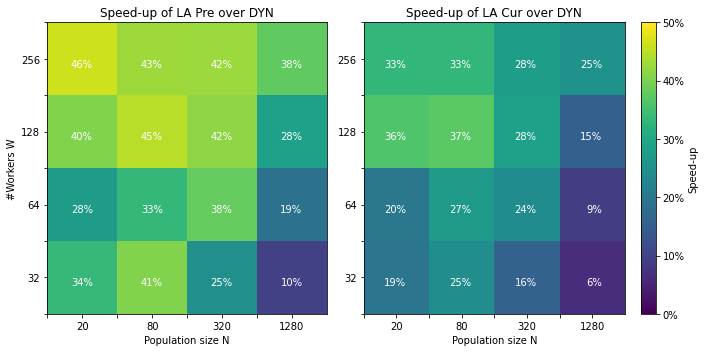

In [19]:
#Creation of Fig 7 and 10b
fig, axes = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios': [1,1+1/6]})

ax=axes[0]


vmax=50

frac_speedup = (1-(PPParray/ORIarray))*100
# vmax=np.max(np.matrix(frac_speedup))


im = ax.pcolormesh(frac_speedup, vmin=0, vmax=vmax)
# fig.colorbar(im)
show_values(im)

# cbar = fig.colorbar(im, ax=ax, format= '%.0f%%')
# cbar.set_label('Speed-up')

# fig.tight_layout()
plt.xlim(xmax=4)
plt.ylim(ymax=4)
ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
ax.set_xticks(np.arange(0, 4, 0.5))

ax.set_xticklabels(['', '20','', '80', '', '320', '', '1280'])
ax.set_xlabel("Population size N")
ax.set_ylabel("#Workers W")
ax.set_title('Speed-up of LA Pre over DYN')

#Creation of Fig 9 and 10c
ax=axes[1]


vmax=50

frac_speedup = (1-(LAarray/ORIarray))*100
# vmax=np.max(np.matrix(frac_speedup))


im = ax.pcolormesh(frac_speedup, vmin=0, vmax=vmax)
# fig.colorbar(im)
show_values(im)

cbar = fig.colorbar(im, ax=ax, format= '%.0f%%')
cbar.set_label('Speed-up')

# fig.tight_layout()
plt.xlim(xmax=4)
plt.ylim(ymax=4)
ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
ax.set_xticks(np.arange(0, 4, 0.5))

ax.set_xticklabels(['', '20','', '80', '', '320', '', '1280'])
ax.set_xlabel("Population size N")
# plt.ylabel("#Workers W")
ax.set_title('Speed-up of LA Cur over DYN')

fig.tight_layout()

plt.savefig(outputpath+"/ODEFig4Var"+str(sleepvar)+"_speedup_num_LA_v2.pdf")
plt.show()

# Var 4.0

In [20]:
sleepvar=4.0
filepath = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + "/Data/Model_T2/results/Var"+str(sleepvar)

#global variables
#sleepvar is the variance of the idle time
nodelist=np.array([1, 2,4,8])
workers_per_node = 32

datalist=[]


#Read in files
for i in range(len(nodelist)):
    datalist.append(pd.read_csv(
        os.path.join(filepath, "sleeptimeresults"+str(nodelist[i])+".txt"),
        delimiter = ", ", engine = 'python'))

data1worker=pd.read_csv(os.path.join(filepath, "sleeptimeresults1.txt"), delimiter = ", ", engine = 'python')
    
pop_sizes = datalist[0].loc[datalist[0]['Look_ahead']=='LA_pre']['Pop size'].values
print(pop_sizes)
meanslist = []

for i in range(len(nodelist)):
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='LA_pre']['Runtime Expectation'].values)
    meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
#     meanslist.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)

meanslist_LA = []

for i in range(len(nodelist)):
    meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='LA']['Runtime Expectation'].values)
#     meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='Ori']['Runtime Expectation'].values)
    meanslist_LA.append(datalist[i].loc[datalist[0]['Look_ahead']=='Stat']['Runtime Expectation'].values)

nodelist = nodelist * 32
meanslist

[  20   80  320 1280]


[array([ 54.07741589,  95.38715311, 209.19531336, 736.40482758]),
 array([ 89.24906888, 147.86125979, 318.91762108, 864.31146497]),
 array([ 63.23762092,  88.60582528, 174.14047038, 399.49853008]),
 array([126.05156431, 157.1644222 , 270.87485788, 593.29554853]),
 array([ 73.63419115,  93.68327954, 148.54348877, 286.01007471]),
 array([124.56500385, 163.85055646, 239.26401208, 456.76176015]),
 array([ 93.7031942 , 109.84261792, 151.71356109, 238.88981108]),
 array([175.89669472, 169.3265297 , 231.66570878, 461.25738878])]

In [21]:
#Turn them into arrays (rows correspond to same number of workers)
PPParray=np.zeros((len(nodelist),len(pop_sizes)))
ORIarray=np.zeros((len(nodelist),len(pop_sizes)))
LAarray=np.zeros((len(nodelist),len(pop_sizes)))
Statarray=np.zeros((len(nodelist),len(pop_sizes)))

for i in range(len(nodelist)):
    print(i)
    PPParray[i,:]=meanslist[2*i]
    ORIarray[i,:]=meanslist[2*i+1]
    
for i in range(len(nodelist)):
    print(i)
    LAarray[i,:]=meanslist_LA[2*i]
    Statarray[i,:]=meanslist_LA[2*i+1]



0
1
2
3
0
1
2
3


/tmp/ipykernel_866/973755879.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
/tmp/ipykernel_866/973755879.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['','32','', '64','', '128','',  '256'])


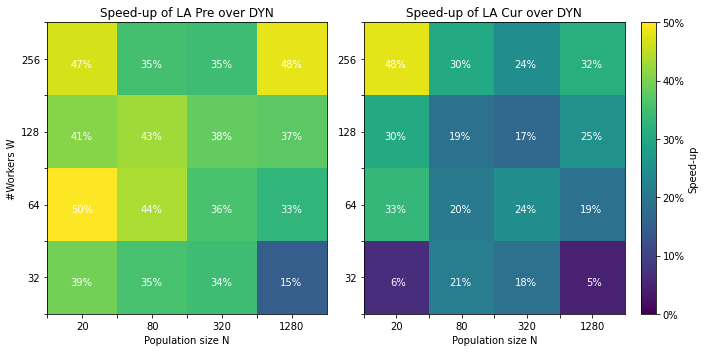

In [22]:
#Creation of Fig 7 and 10b
fig, axes = plt.subplots(1,2,figsize=(10,5), gridspec_kw={'width_ratios': [1,1+1/6]})

ax=axes[0]


vmax=50

frac_speedup = (1-(PPParray/ORIarray))*100
# vmax=np.max(np.matrix(frac_speedup))


im = ax.pcolormesh(frac_speedup, vmin=0, vmax=vmax)
# fig.colorbar(im)
show_values(im)

# cbar = fig.colorbar(im, ax=ax, format= '%.0f%%')
# cbar.set_label('Speed-up')

# fig.tight_layout()
plt.xlim(xmax=4)
plt.ylim(ymax=4)
ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
ax.set_xticks(np.arange(0, 4, 0.5))

ax.set_xticklabels(['', '20','', '80', '', '320', '', '1280'])
ax.set_xlabel("Population size N")
ax.set_ylabel("#Workers W")
ax.set_title('Speed-up of LA Pre over DYN')

#Creation of Fig 9 and 10c
ax=axes[1]


vmax=50

frac_speedup = (1-(LAarray/ORIarray))*100
# vmax=np.max(np.matrix(frac_speedup))


im = ax.pcolormesh(frac_speedup, vmin=0, vmax=vmax)
# fig.colorbar(im)
show_values(im)

cbar = fig.colorbar(im, ax=ax, format= '%.0f%%')
cbar.set_label('Speed-up')

# fig.tight_layout()
plt.xlim(xmax=4)
plt.ylim(ymax=4)
ax.set_yticklabels(['','32','', '64','', '128','',  '256'])
ax.set_xticks(np.arange(0, 4, 0.5))

ax.set_xticklabels(['', '20','', '80', '', '320', '', '1280'])
ax.set_xlabel("Population size N")
# plt.ylabel("#Workers W")
ax.set_title('Speed-up of LA Cur over DYN')

fig.tight_layout()

plt.savefig(outputpath+"/ODEFig4Var"+str(sleepvar)+"_speedup_num_LA_v2.pdf")
plt.show()